In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import enum
import scanpy as sc

# If you want to work with other data, please update the 'filename' parameter below and 
# Make sure that the file is in the same directory as this jupyter notebook 
filename = "anndata/Dorsal_midbrain_cell_bin"

In [11]:
import anndata
DIV = 1000

# st parameter is only needed for dorsal midbrain data
def read_anndata(data_name, st):
    print(f"====== Reading anndata {data_name}")
    
    if "midbrain" in data_name and st != "":
        return read_midbrain_data(data_name, st)
    
    adata = anndata.read_h5ad(f"{data_name}.h5ad")
    if 'X_spatial' in adata.obsm:
        spatial = adata.obsm['X_spatial']
    else:
        spatial = adata.obsm['spatial']
    print (f"Number of cells/spots: {len(spatial)}")
    sparse_matrix = adata.X
    
    # filter = int(len(spatial)/DIV)
    print("Removing genes with all zero values")
    dense_matrix = sparse_matrix.toarray()
    gene_df = pd.DataFrame(dense_matrix)
    filtered_columns = [col for col in gene_df.columns if (gene_df[col] != 0).sum() > 0]
    gene_df_filtered = gene_df[filtered_columns]
    
    ann = {}
    arr = []
    i = 0
    if "MOSTA" in data_name or "midbrain" in data_name:
        annotation = adata.obs['annotation']
        for obj in adata.obs['annotation']:
            if obj not in ann:
                ann[obj] = i
                i += 1
        for obj in adata.obs['annotation']:
            arr.append(ann[obj])
    else:
        annotation = adata.obs['cell_type']
        for obj in adata.obs['cell_type']:
            if obj not in ann:
                ann[obj] = i
                i += 1
        for obj in adata.obs['cell_type']:
            arr.append(ann[obj])
    
    return spatial, gene_df_filtered, arr, annotation

def read_midbrain_data(data_name, num_string):
    start =0
    end = 0
    adata = anndata.read_h5ad(f"{data_name}.h5ad")
    num = 0
    for i, cellId in enumerate(adata.obs['annotation'].index):
        if num_string in cellId:
            if num == 0:
                start = i
            num += 1
    end = start + num
    print(f"Midbrain -> spots/cells = {end-start}")
    spatial = adata.obsm['spatial'][start:end]
    print (f"Number of cells/spots: {len(spatial)}")
    sparse_matrix = adata.X[start:end]
    arr = []
    ann = {}
    i = 0
    index = adata.obs['annotation'].index[start:end]
    for id in index:
        obj = adata.obs['annotation'][id]
        if obj not in ann:
            ann[obj] = i
            i += 1
    for id in index:
        obj = adata.obs['annotation'][id]
        arr.append(ann[obj])
        
    # filter = int(len(spatial)/DIV * 1.5)
    print("Removing genes with all zero values")
    dense_matrix = sparse_matrix.toarray()
    gene_df = pd.DataFrame(dense_matrix)
    filtered_columns = [col for col in gene_df.columns if (gene_df[col] != 0).sum() > 0]
    gene_df_filtered = gene_df[filtered_columns]
    
    return spatial, gene_df_filtered, arr, adata.obs['annotation'][start:end]

In [12]:
spatial, gene_df_filtered, arr, ann = read_anndata(filename, "")

====== Reading anndata Dorsal_midbrain_cell_bin
Number of cells/spots: 26738
Removing genes with all zero values


In [13]:
gene_df_filtered

,0,1,2,3,4,5,6,7,8,9,...,24035,24036,24037,24038,24039,24040,24041,24042,24043,24044
0,0.000000,0.0,0.725739,0.725739,1.141836,1.141836,0.725739,0.725739,0.725739,0.725739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,1.426898,0.000000,1.748962,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,2.051748,0.677417,0.000000,0.000000,1.362605,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.934627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,2.249852,0.000000,0.992239,0.000000,0.000000,0.992239,1.806943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26733,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.206665,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
26734,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
26735,0.954521,0.0,0.000000,0.000000,0.000000,0.000000,0.954521,2.195794,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
26736,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.006593,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [14]:
pd.DataFrame(spatial)

,0,1
0,2829.000000,-10000.000000
1,2868.000000,-9998.000000
2,2864.000000,-9975.000000
3,2962.000000,-9971.000000
4,2937.000000,-9966.000000
...,...,...
26733,23572.313833,-5470.883008
26734,23552.651407,-5466.151309
26735,23523.811435,-5451.582301
26736,23475.819778,-5449.391214


In [15]:
ann

CELL.100034_1      RGC
CELL.100035_1      Ery
CELL.100191_1      Ery
CELL.100256_1      Ery
CELL.100264_1      Ery
                 ...  
CELL.326357_5    Micro
CELL.326359_5    Fibro
CELL.326384_5    Fibro
CELL.326391_5    Fibro
CELL.326412_5    Fibro
Name: annotation, Length: 26738, dtype: category
Categories (11, object): ['Endo', 'Ery', 'Fibro', 'GABA Neu', ..., 'Glu NeuB', 'Micro', 'NeuB', 'RGC']

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_pca_variance_ratio(data, max_components=10000):
    # Standardize the data
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data)


    pca = PCA(n_components=max_components)
    pca.fit_transform(data_standardized)
    explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

    # Create figure
    plt.figure(figsize=(16, 10))

    # Plot cumulative explained variance ratio
    plt.plot(range(1, max_components + 1), explained_variance_ratio, color='blue', linewidth=2)
    plt.xlabel('Number of Principal Components', fontsize=30)
    plt.ylabel('Cumulative Explained Variance Ratio', fontsize=30)
    plt.title('PCA Cumulative Explained Variance Ratio', fontsize=30)
    plt.grid()
    plt.xticks(fontsize=30)  # Set x-axis tick label size
    plt.yticks(fontsize=30)  # Set y-axis tick label size

    plt.tight_layout()
    plt.show()


====== Reading anndata Dorsal_midbrain_cell_bin
Midbrain -> spots/cells = 3671
Number of cells/spots: 3671
Removing genes with all zero values
min_val -> 3671


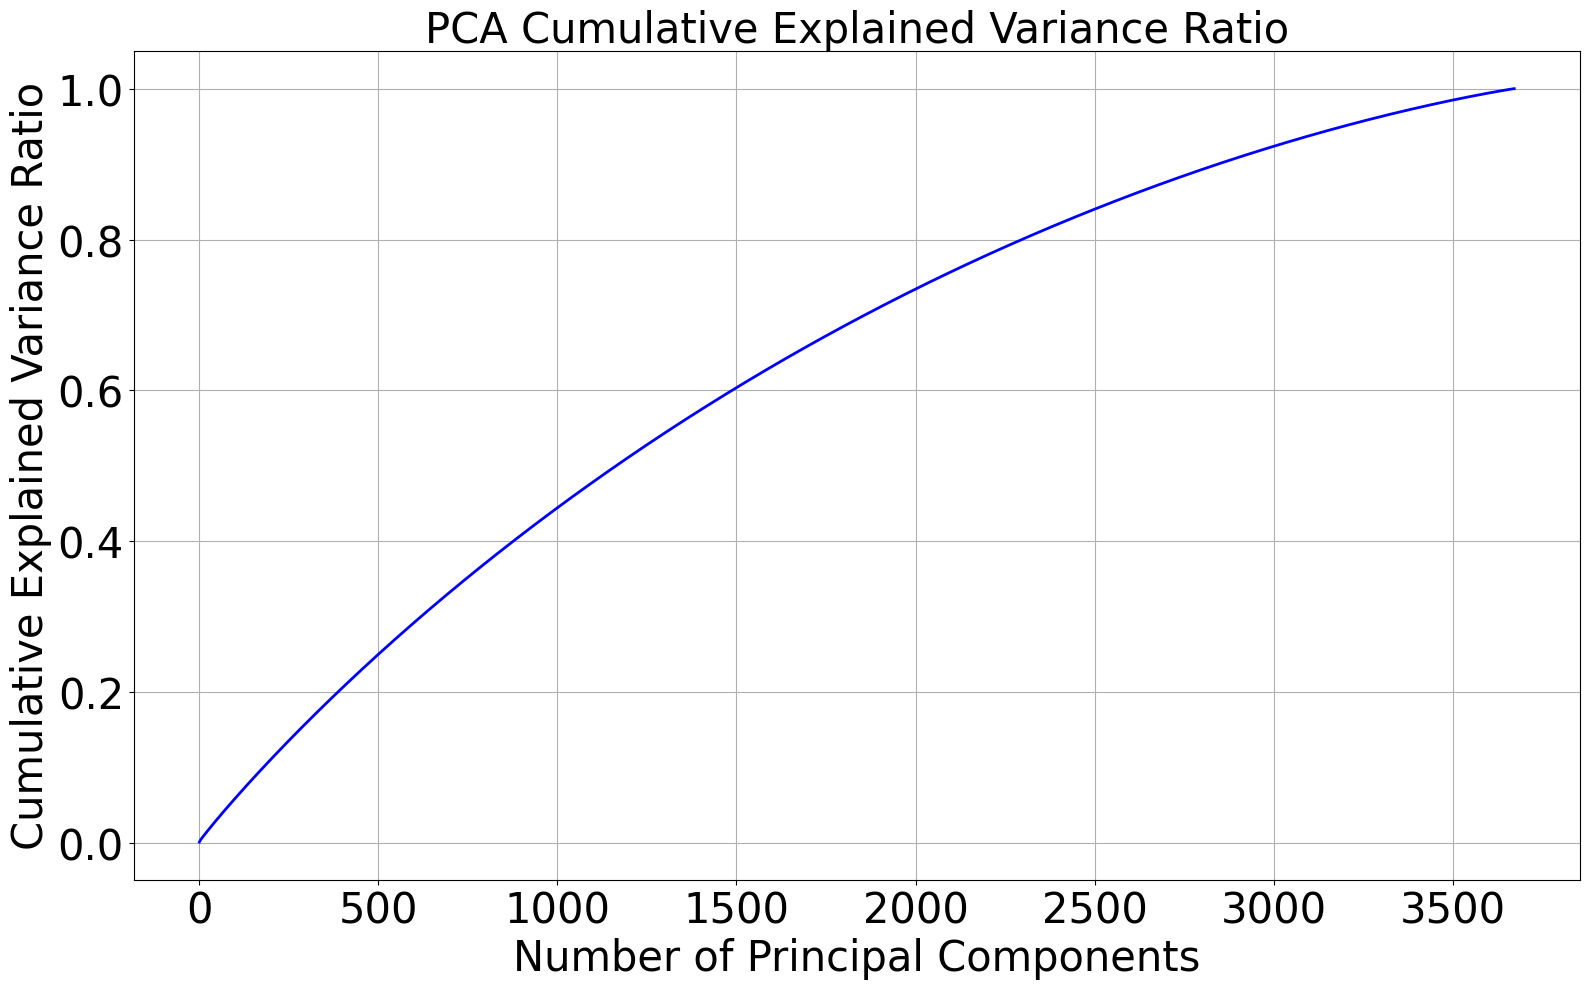

====== Reading anndata Dorsal_midbrain_cell_bin
Midbrain -> spots/cells = 6650
Number of cells/spots: 6650
Removing genes with all zero values
min_val -> 6650


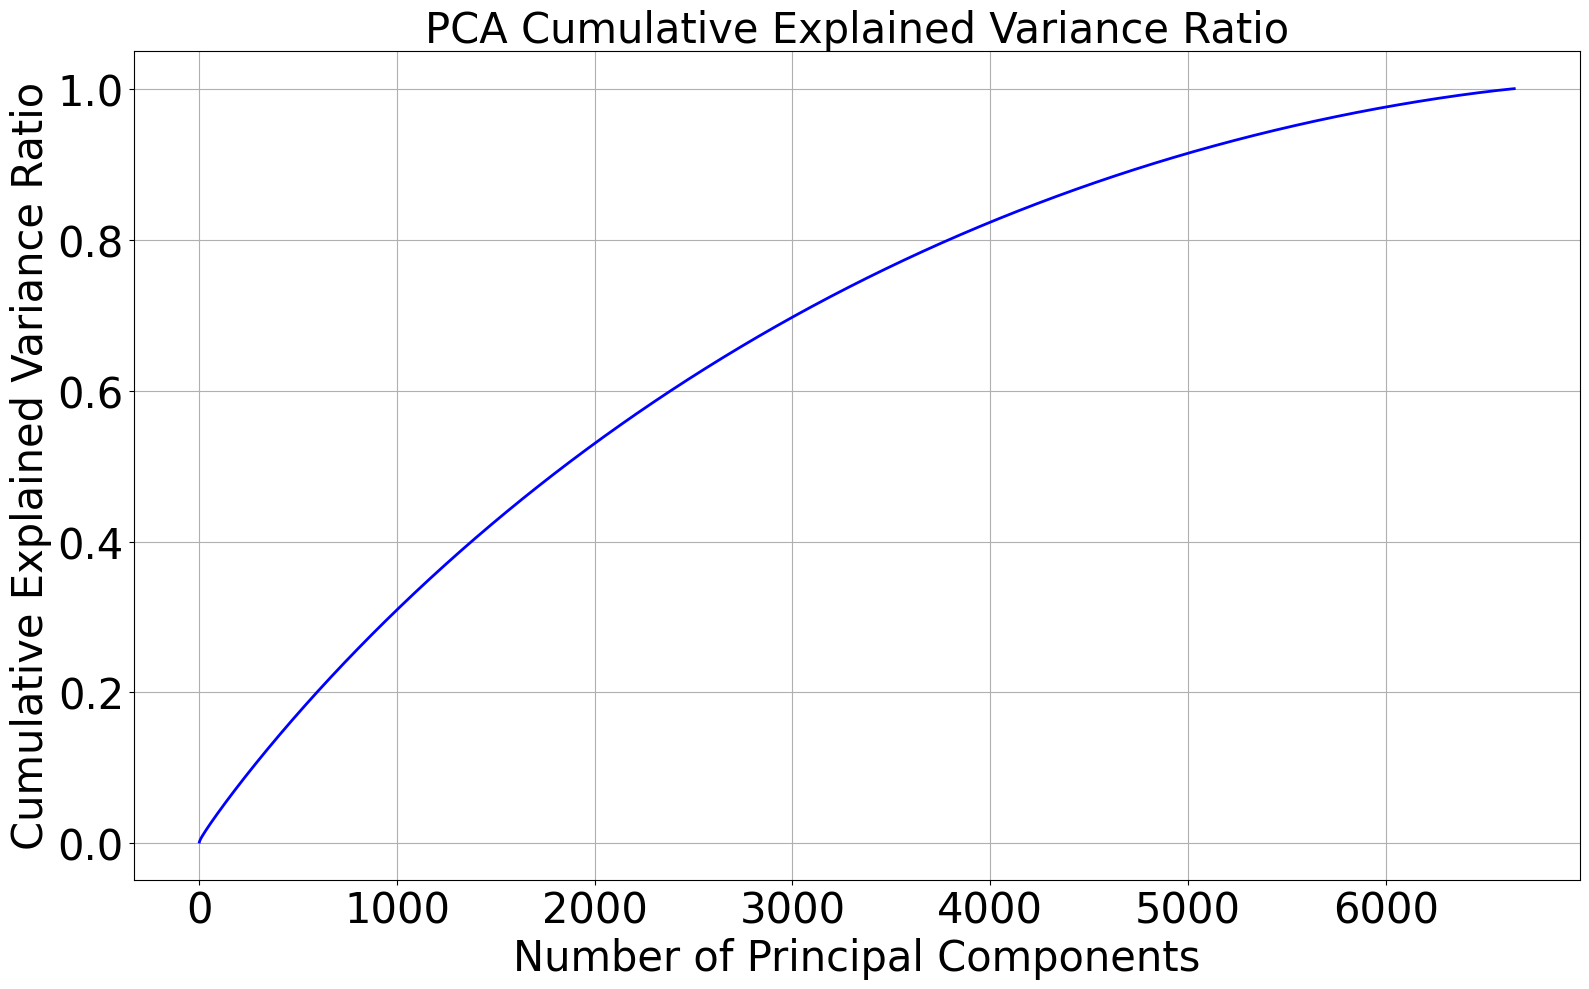

====== Reading anndata Dorsal_midbrain_cell_bin
Midbrain -> spots/cells = 3648
Number of cells/spots: 3648
Removing genes with all zero values
min_val -> 3648


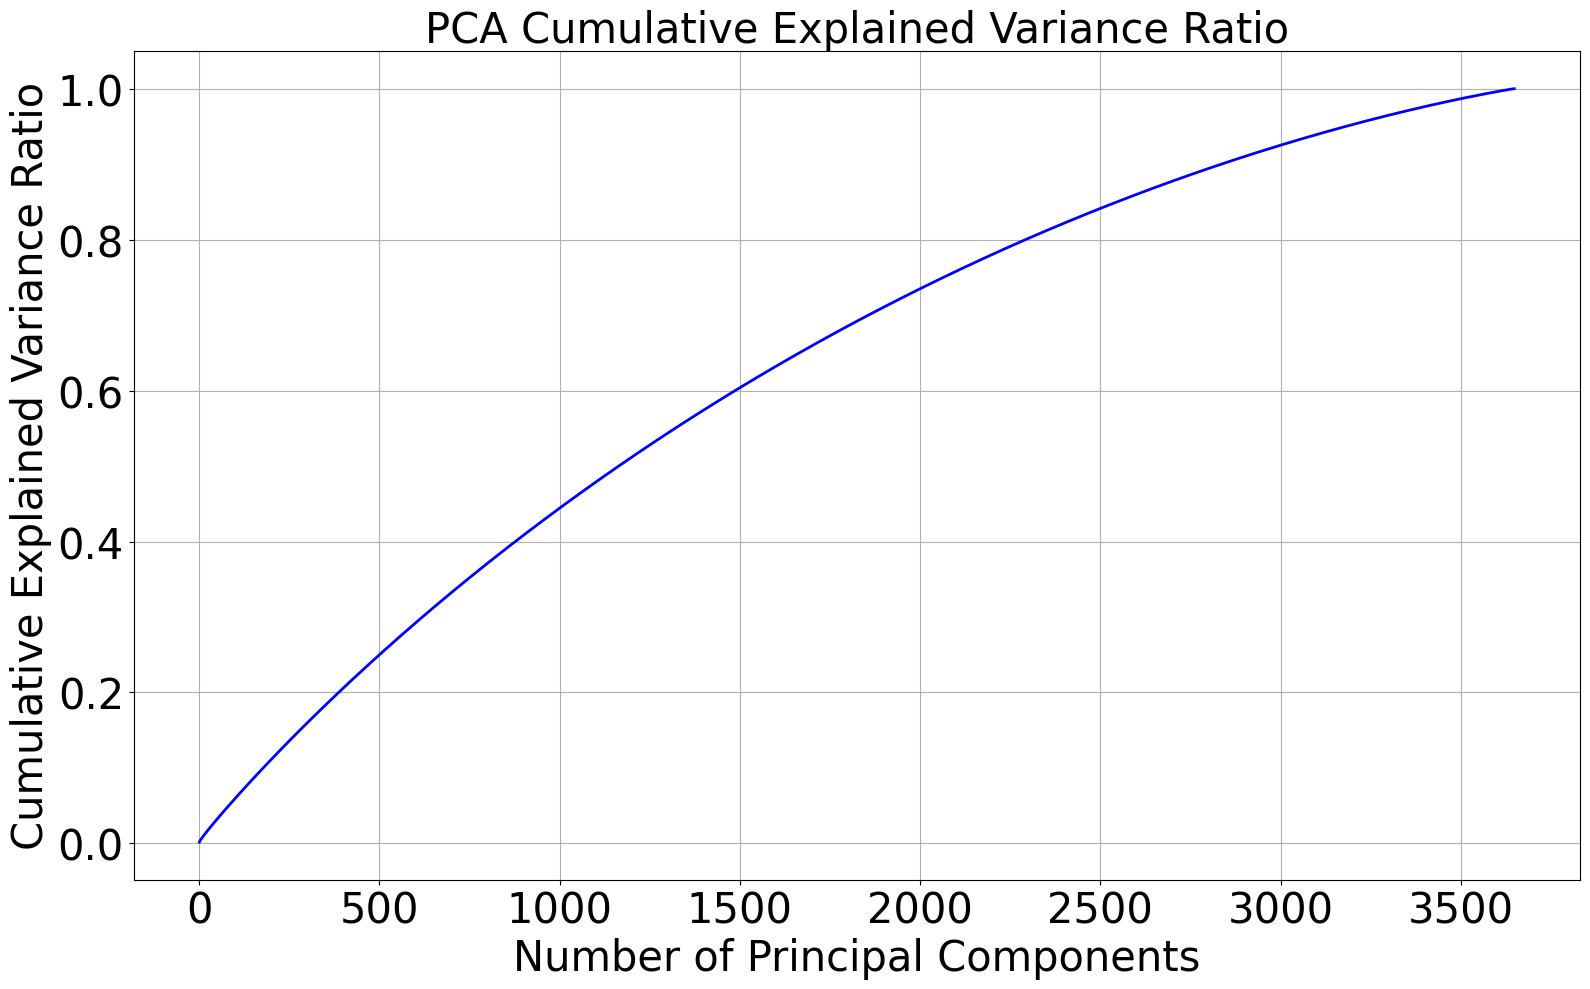

====== Reading anndata Dorsal_midbrain_cell_bin
Midbrain -> spots/cells = 5503
Number of cells/spots: 5503
Removing genes with all zero values
min_val -> 5503


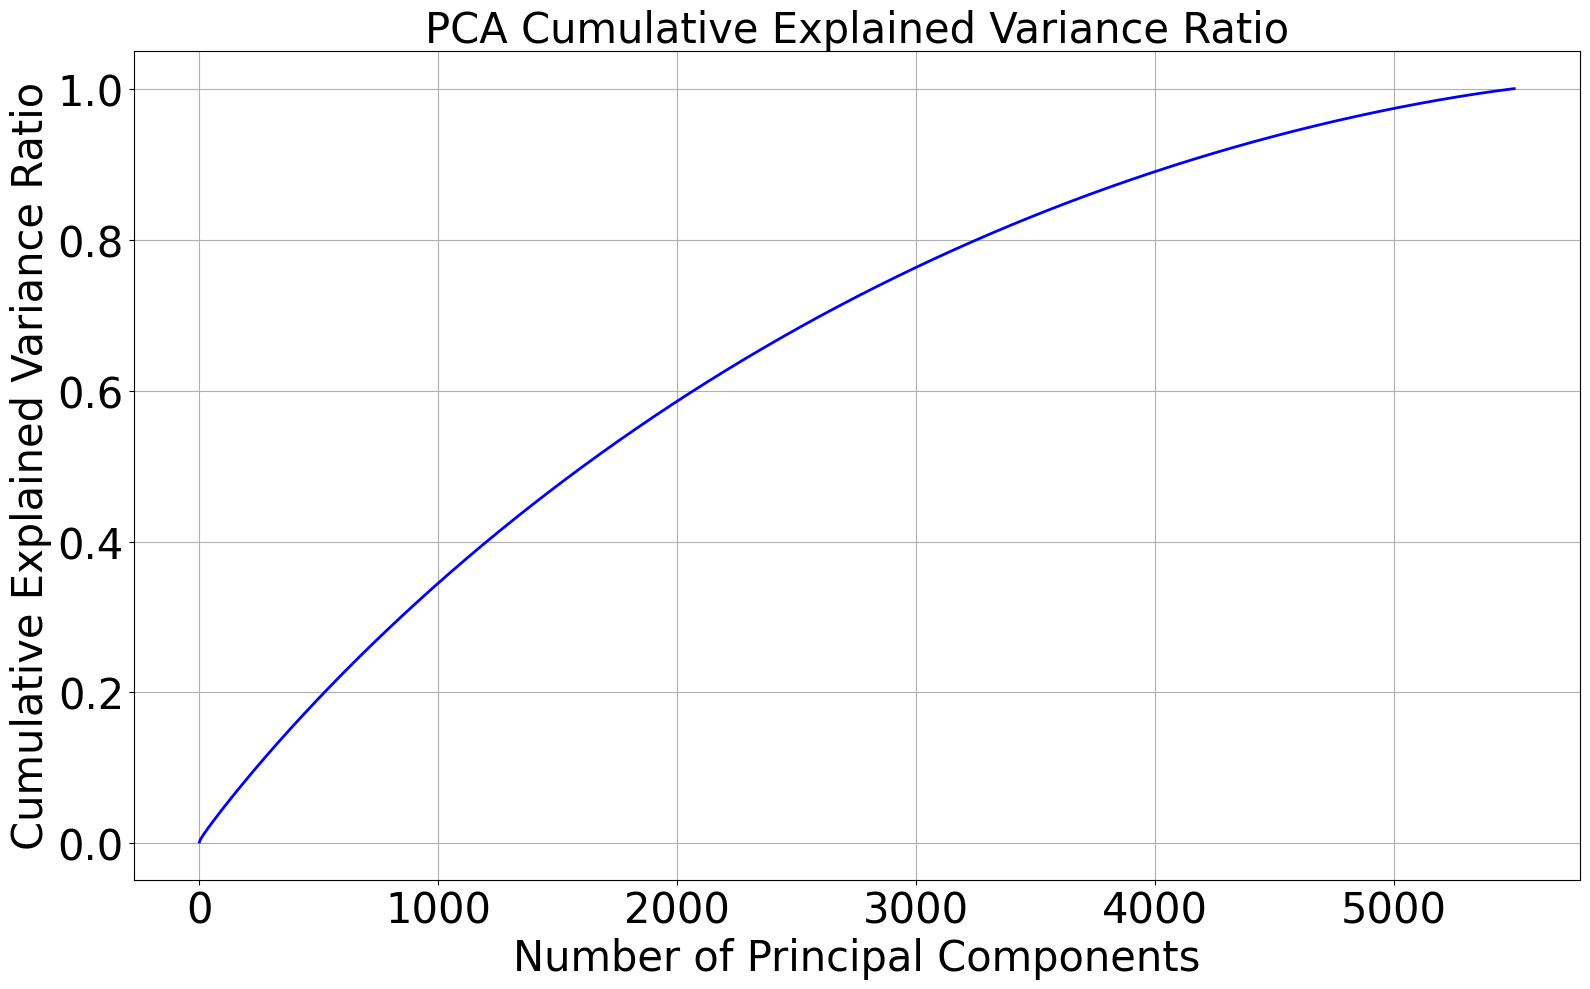

====== Reading anndata Dorsal_midbrain_cell_bin
Midbrain -> spots/cells = 7266
Number of cells/spots: 7266
Removing genes with all zero values
min_val -> 7266


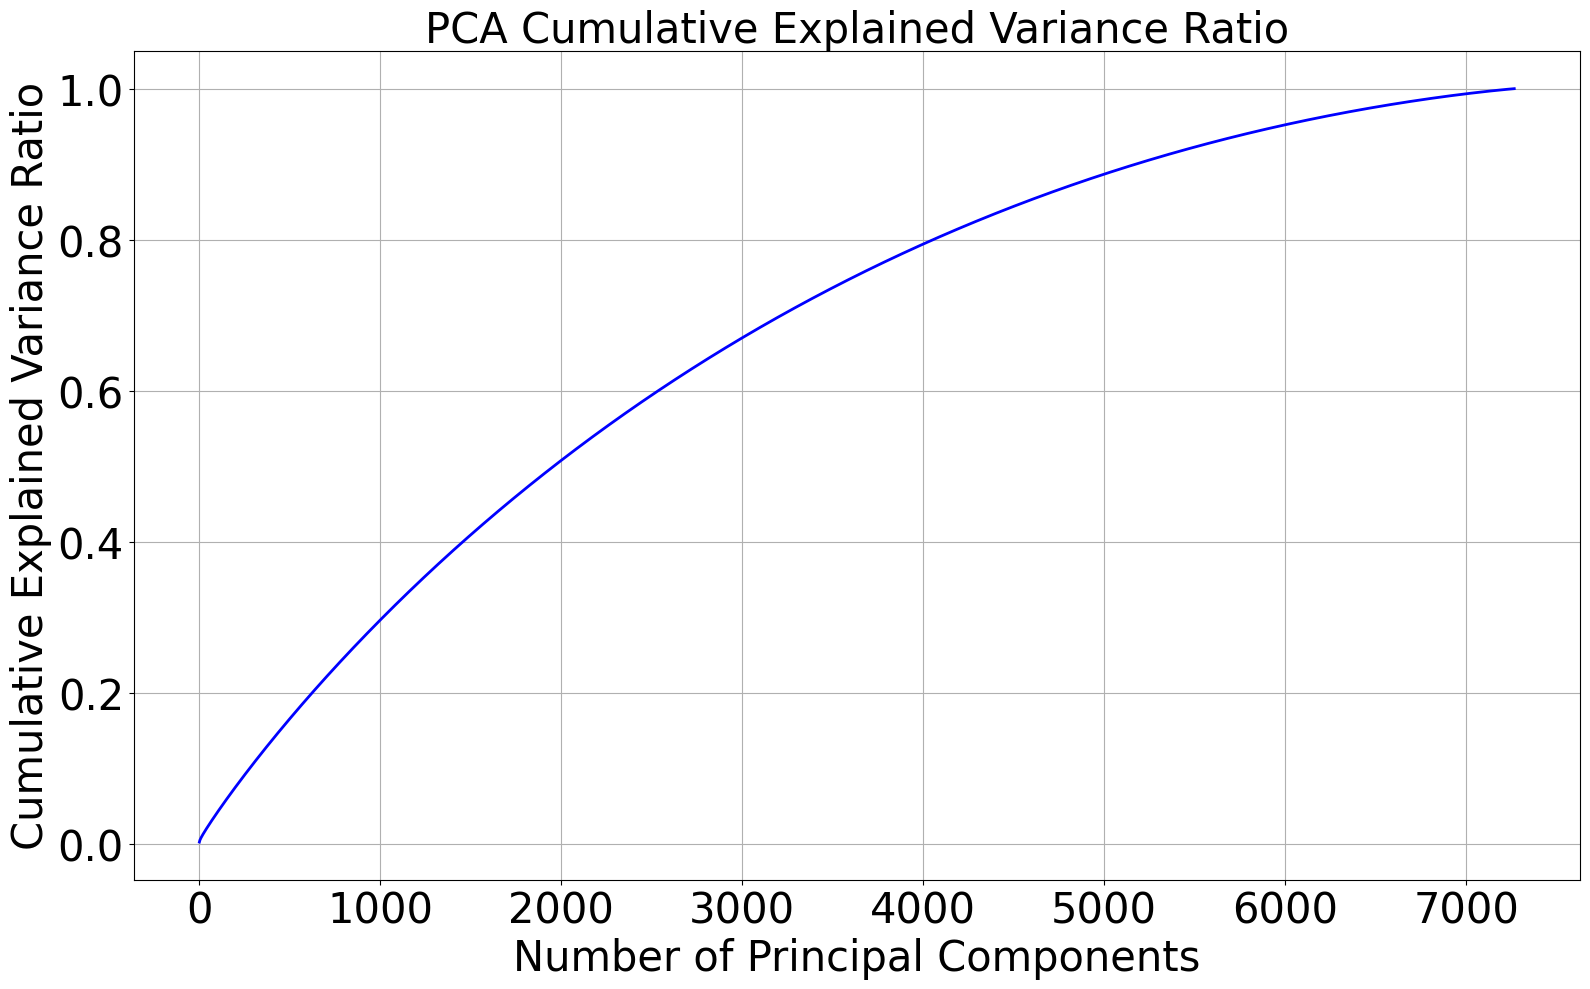

In [17]:
for st in ["_1", "_2", "_3", "_4", "_5"]:
    spatial, gene_df_filtered, arr, ann = read_anndata("anndata/Dorsal_midbrain_cell_bin", st)
    
    #print(gene_df_filtered)
    #print(pd.DataFrame(spatial))
    #print(ann)

    num_rows = gene_df_filtered.shape[0]
    num_columns = gene_df_filtered.shape[1]

    min_value = min(num_rows, num_columns)
    print(f"min_val -> {min_value}")
    plot_pca_variance_ratio(gene_df_filtered, min_value)

====== Reading anndata human_renal_medula_Puck_200205_13
Number of cells/spots: 12531
Removing genes with all zero values
min_val -> 12531


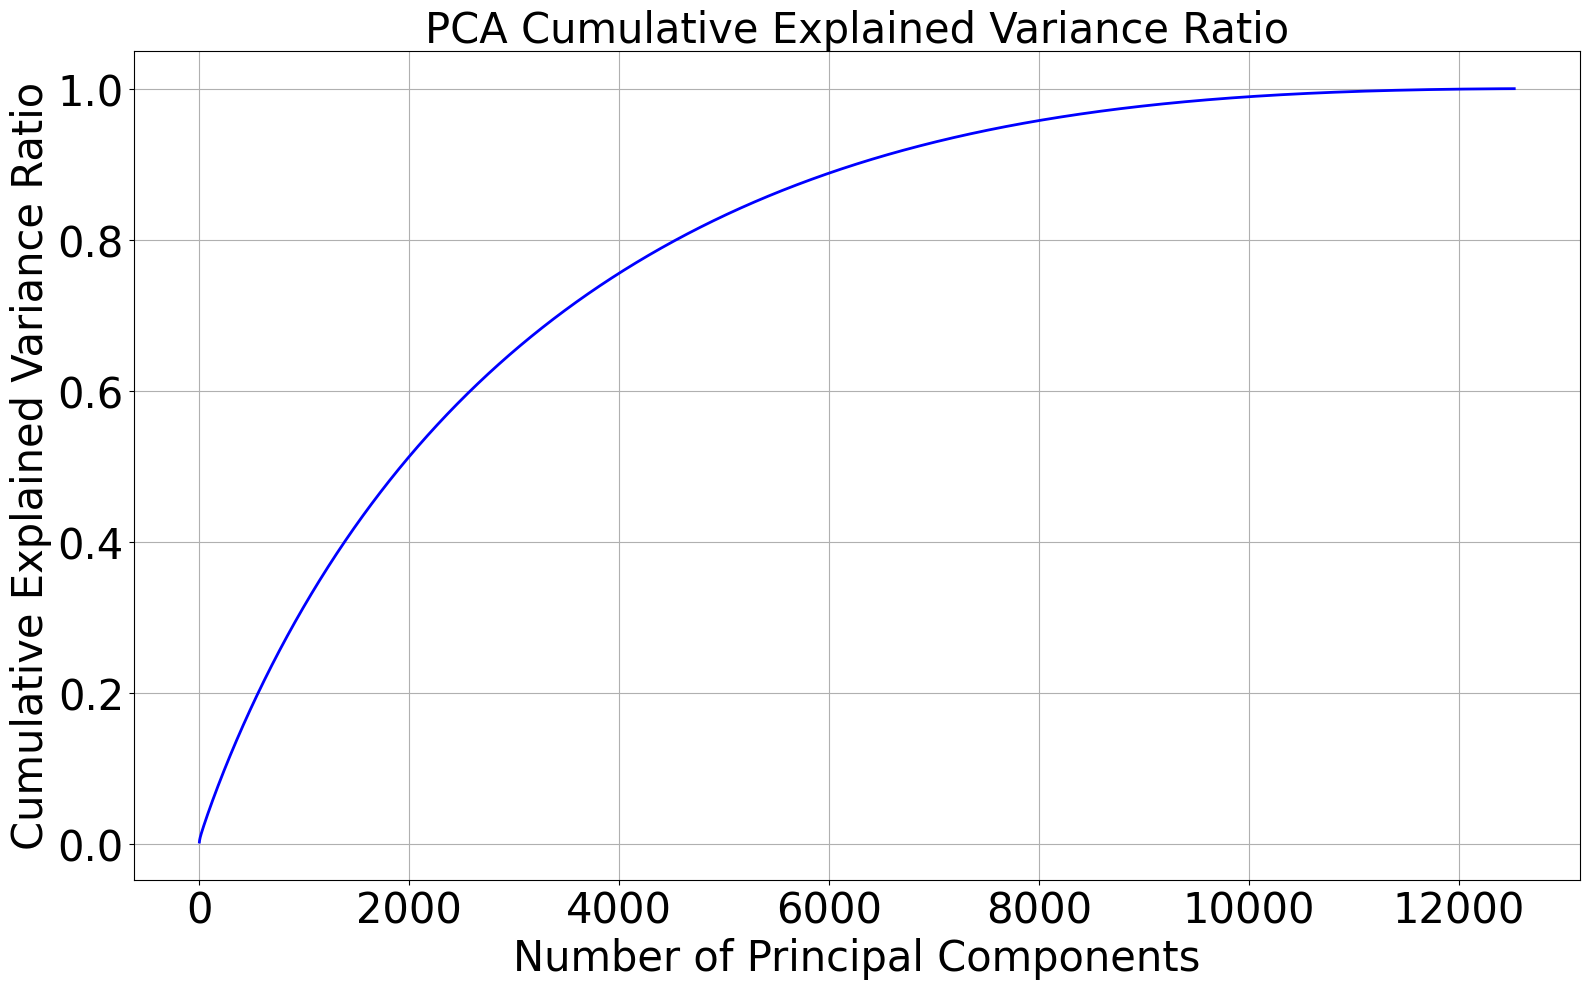

====== Reading anndata cortex_kidney_human
Number of cells/spots: 10419
Removing genes with all zero values
min_val -> 10419


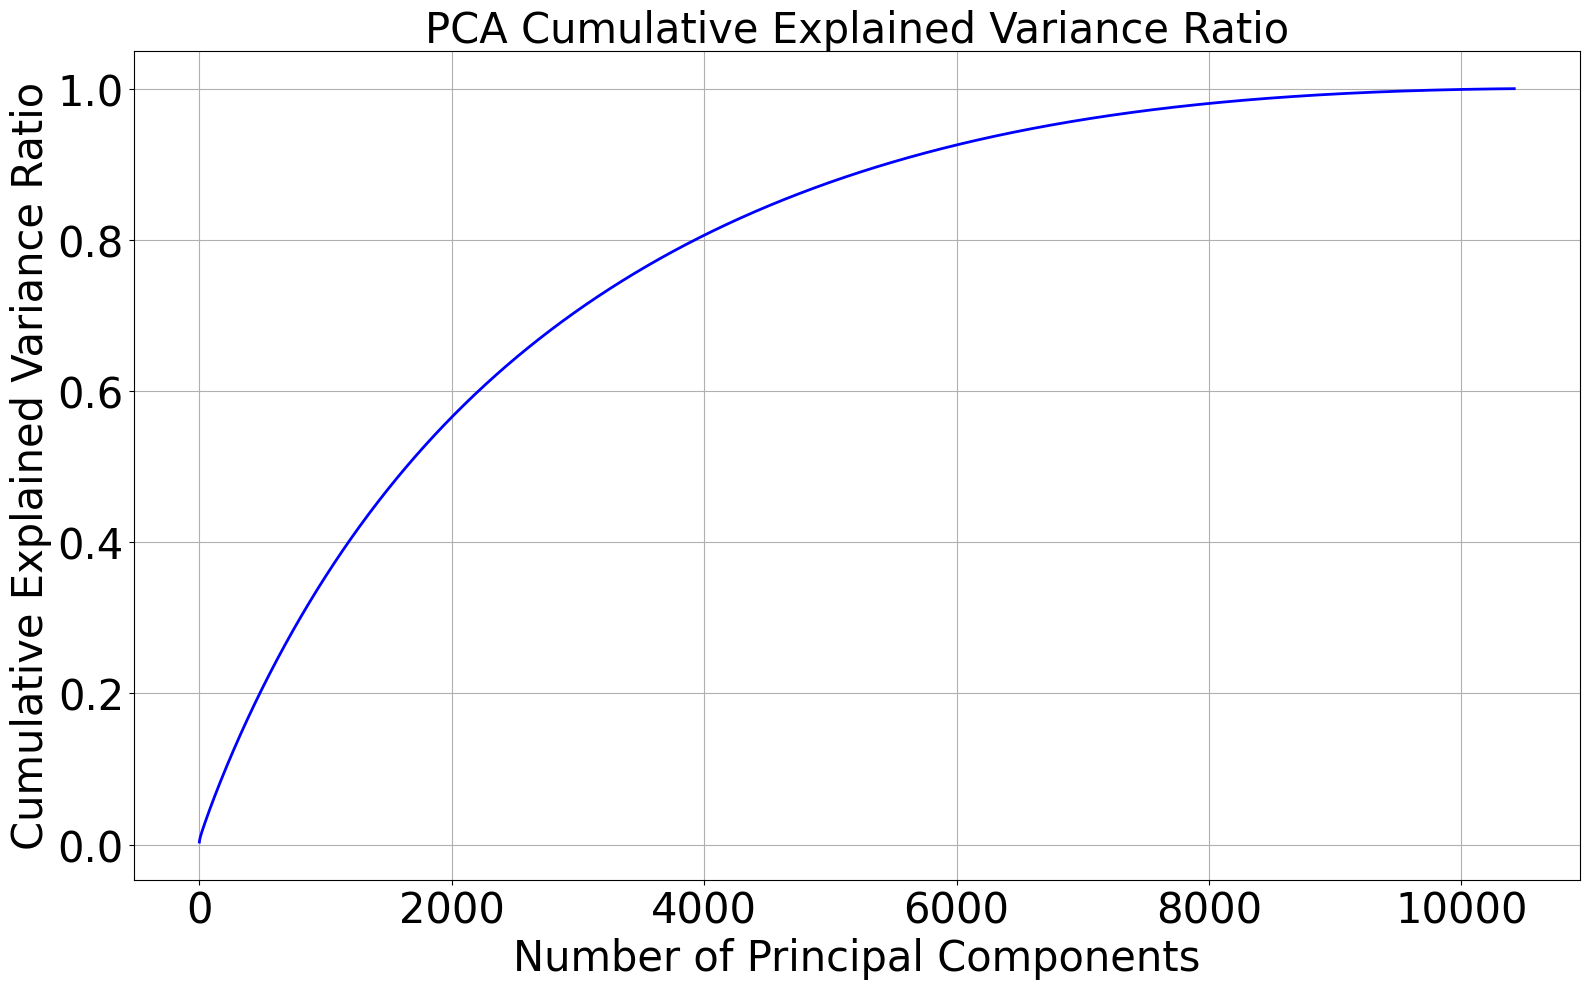

====== Reading anndata mouse_kidney_Puck_191112_05
Number of cells/spots: 10888
Removing genes with all zero values
min_val -> 10888


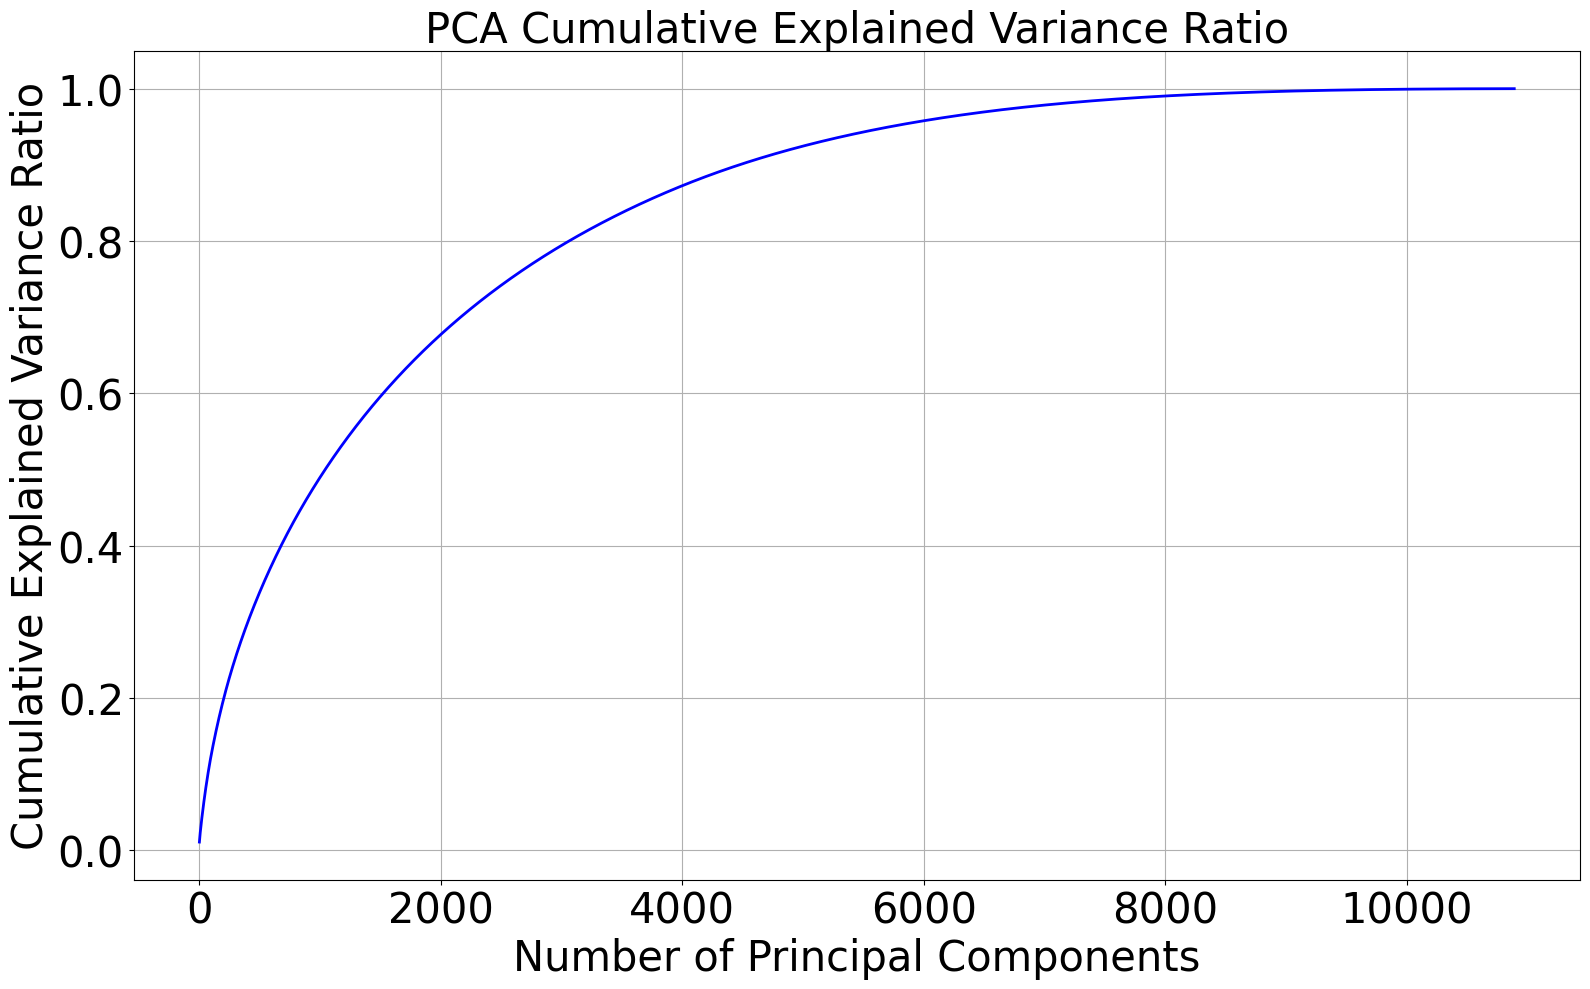

====== Reading anndata E9.5_E1S1.MOSTA
Number of cells/spots: 5913
Removing genes with all zero values
min_val -> 5913


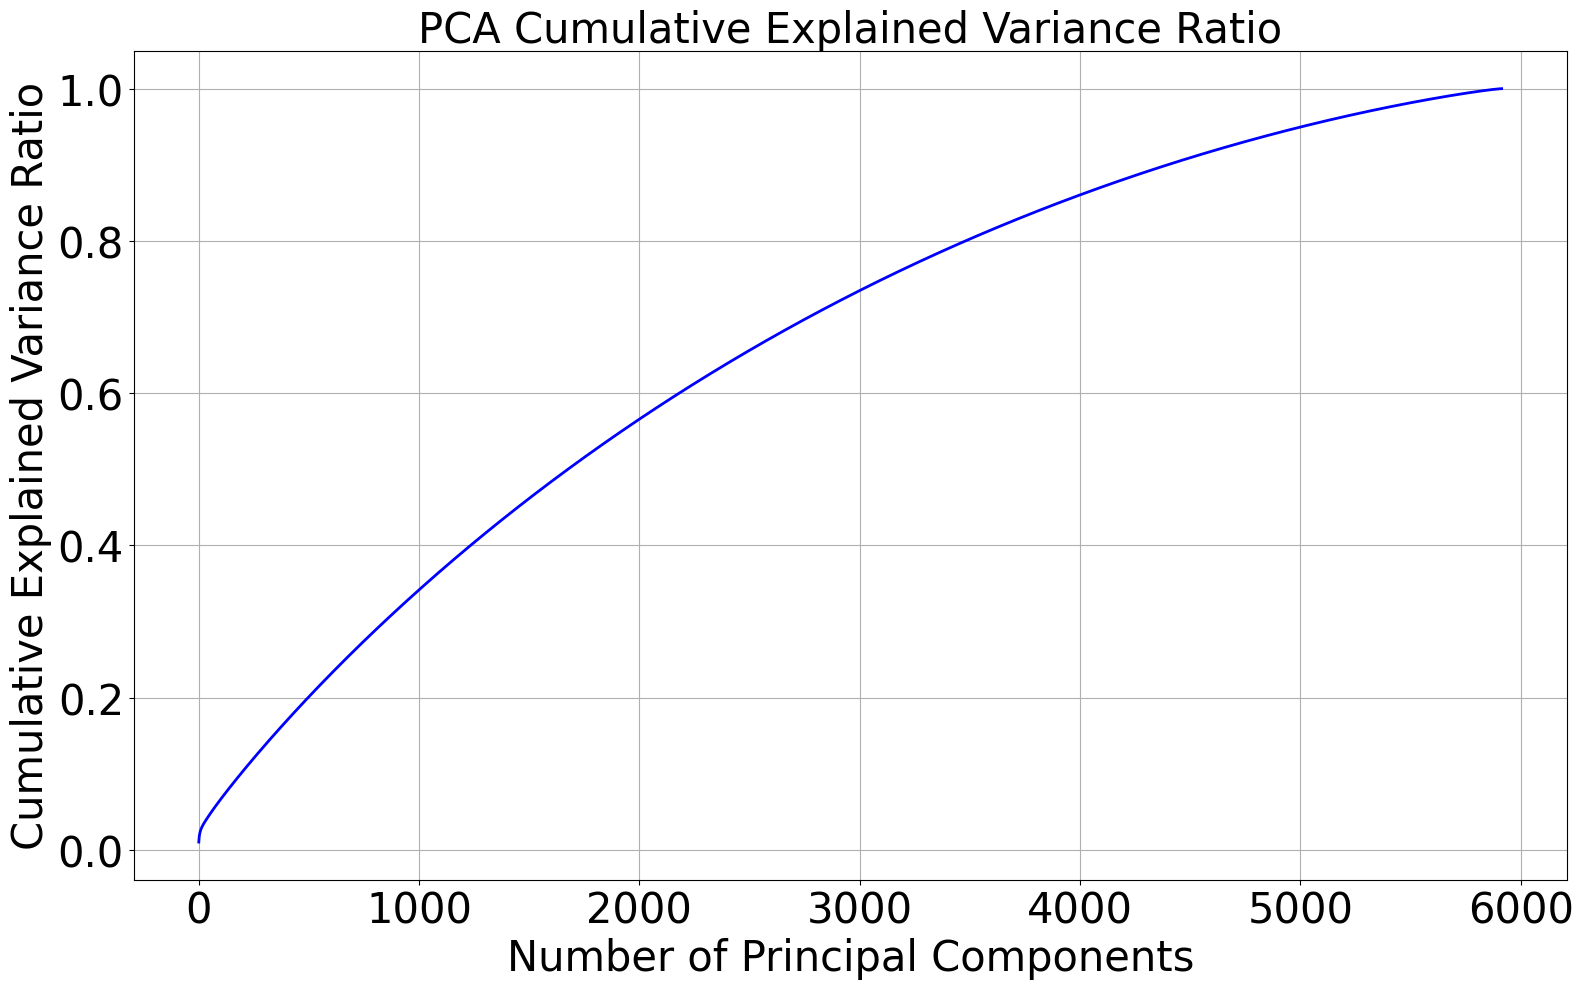

====== Reading anndata E9.5_E2S4.MOSTA
Number of cells/spots: 5797
Removing genes with all zero values
min_val -> 5797


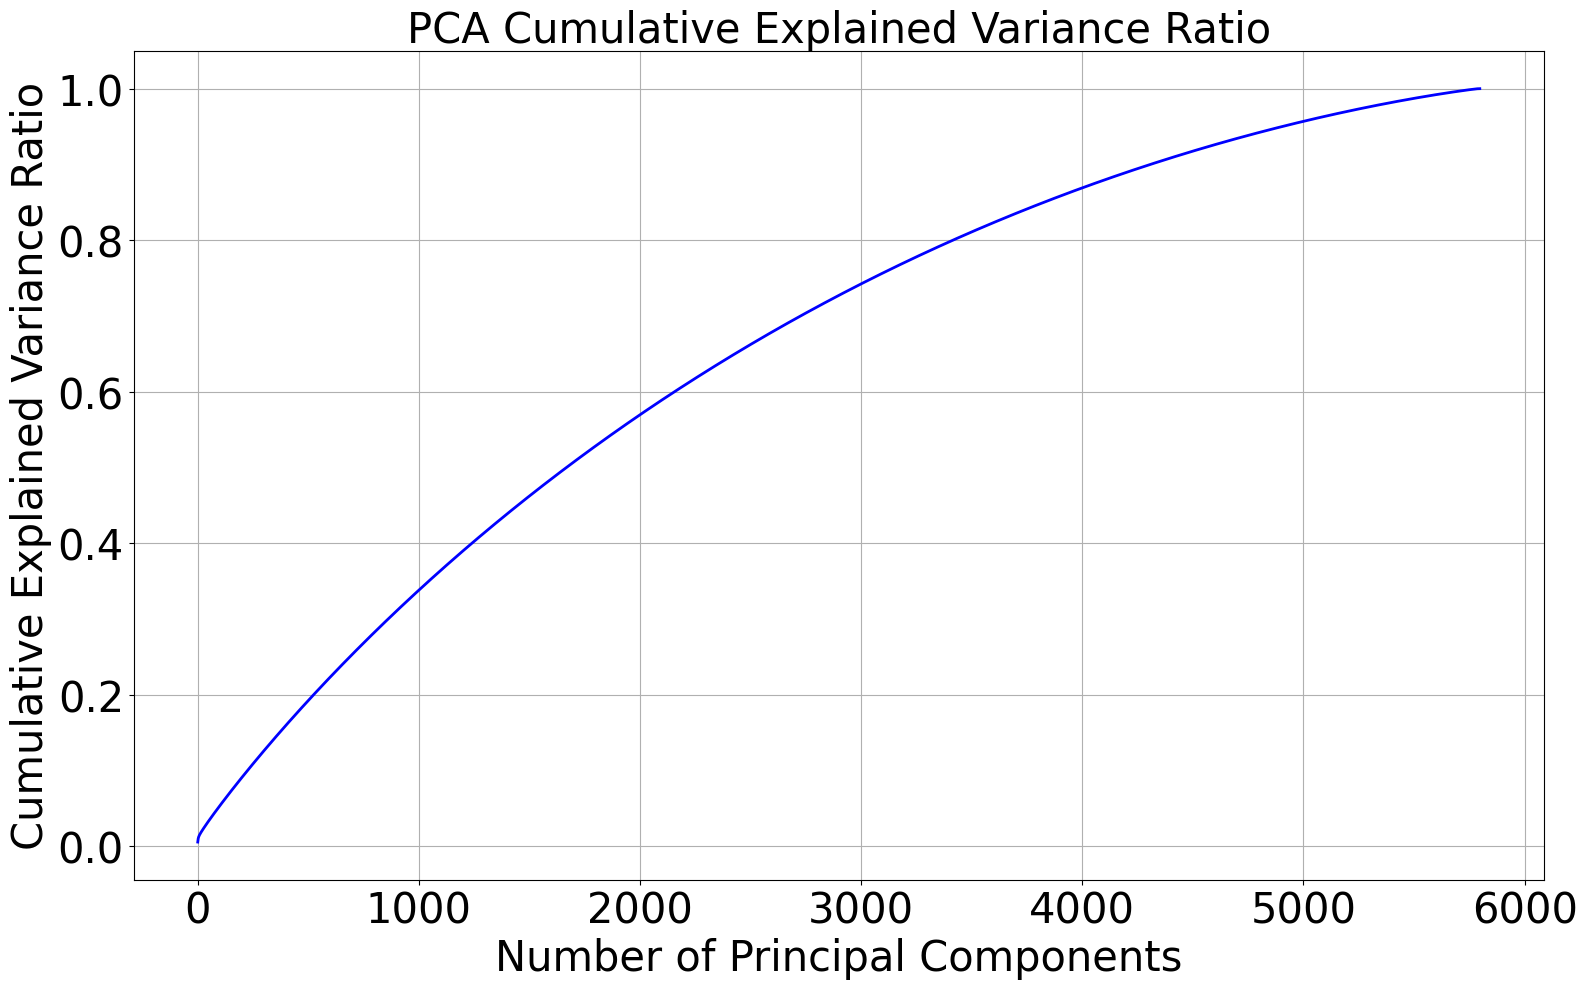

====== Reading anndata E10.5_E2S1.MOSTA
Number of cells/spots: 8494
Removing genes with all zero values
min_val -> 8494


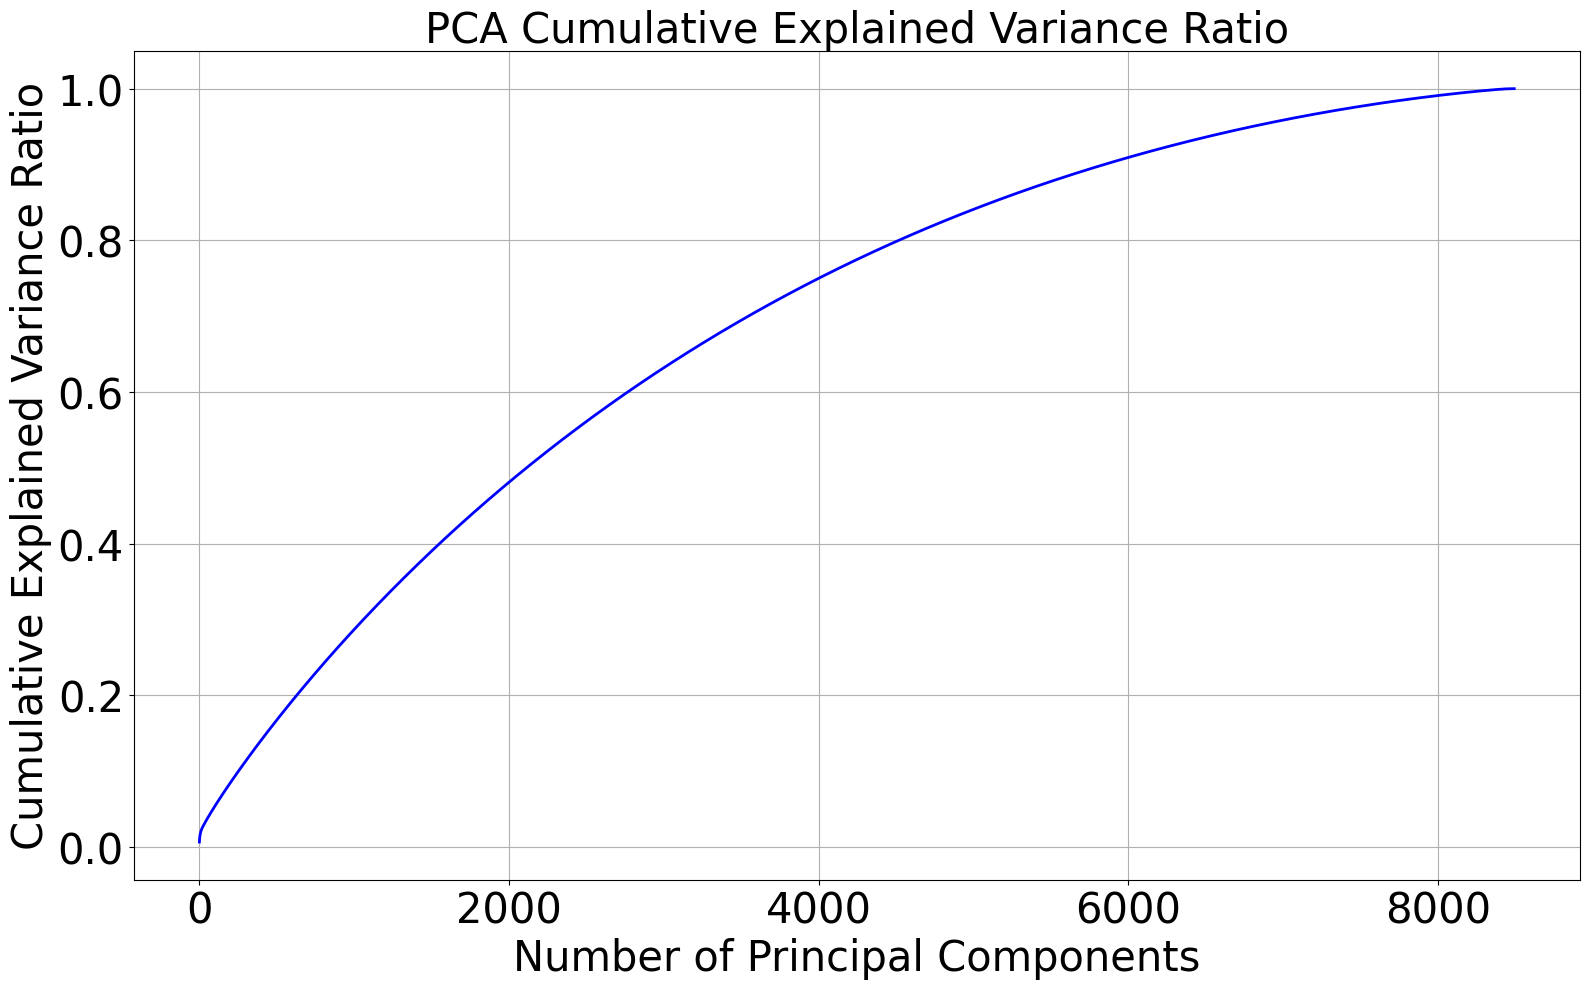

In [18]:
for filename in ["anndata/human_renal_medula_Puck_200205_13", "anndata/human_cortex_kidney_Puck_200205_17","anndata/mouse_kidney_Puck_191112_05", "anndata/E9.5_E1S1.MOSTA", "anndata/E9.5_E2S4.MOSTA", "anndata/E10.5_E2S1.MOSTA"]:
    spatial, gene_df_filtered, arr, ann = read_anndata(filename, "")
    num_rows = gene_df_filtered.shape[0]
    num_columns = gene_df_filtered.shape[1]

    min_value = min(num_rows, num_columns)
    print(f"min_val -> {min_value}")
    plot_pca_variance_ratio(gene_df_filtered, min_value)

Plotting legend for clusters.

In [105]:
import matplotlib.pyplot as plt

def plot_legend_with_colors(names, colors):
    if len(names) != len(colors):
        raise ValueError("The number of names must match the number of colors.")

    # Create a dummy plot with invisible data to generate the legend
    for name, color in zip(names, colors):
        plt.plot([], [], label=name, color=color, linewidth=0)

    # Display the legend
    plt.legend(loc='best')

    # Show the plot (or you can save it to a file using plt.savefig())
    plt.show()

In [114]:
colors = [
    (0.38823529411764707, 0.38823529411764707, 0.38823529411764707, 1.0),
    (0.8549019607843137, 0.8549019607843137, 0.9215686274509803, 1.0),
    (0.19215686274509805, 0.6392156862745098, 0.32941176470588235, 1.0),
    (0.7803921568627451, 0.9137254901960784, 0.7529411764705882, 1.0),
    (0.7411764705882353, 0.7411764705882353, 0.7411764705882353, 1.0),
    (0.9921568627450981, 0.6823529411764706, 0.4196078431372549, 1.0),
    (0.6313725490196078, 0.8509803921568627, 0.6078431372549019, 1.0),
    (0.4196078431372549, 0.6823529411764706, 0.8392156862745098, 1.0),
    (0.8509803921568627, 0.8509803921568627, 0.8509803921568627, 1.0),
    (0.19215686274509805, 0.5098039215686274, 0.7411764705882353, 1.0),
    (0.7764705882352941, 0.8588235294117647, 0.9372549019607843, 1.0),
    (0.9921568627450981, 0.5529411764705883, 0.23529411764705882, 1.0),
    (0.6196078431372549, 0.6039215686274509, 0.7843137254901961, 1.0)
]

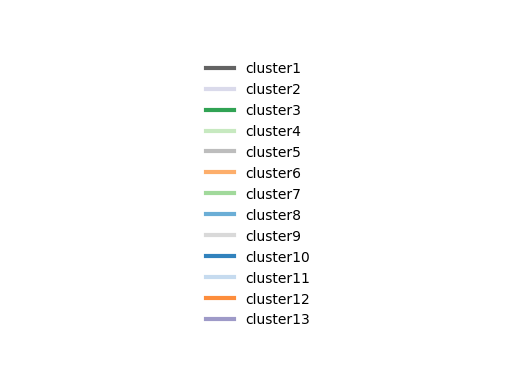

In [115]:
import matplotlib.pyplot as plt

legend_labels = [f'cluster{i + 1}' for i in range(len(colors))]

fig, ax = plt.subplots()

# Create empty lines with the desired labels and colors for the legend
legend_lines = [plt.Line2D([0], [0], linestyle='-', linewidth=3, color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the legend to the plot
ax.legend(handles=legend_lines, loc='center', frameon=False)

# Remove the axis and display the legend
ax.axis('off')

# Show the legend
plt.show()